In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.tf_DMFT_solvers import spont_static_solve, spont_chaotic_solve
import dsn.lib.LowRank.Fig1_Spontaneous.fct_mf as mf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Spontaneous static solver

In [2]:
DTYPE = tf.float64

num_its = 100
eps = 0.2

g_start = 0.25
g_end = 4.0
g_delt = 0.25
_g = np.arange(g_start, g_end, g_delt) # np.abs(np.random.normal(0.0, 1.0, (n,))) + .001
n = _g.shape[0]

_mu_init = 50*np.ones((n,))
_delta_0_init = 50*np.ones((n,))

_Mm = 1.1*np.ones((n,)) # np.abs(np.random.normal(0.0, 1.0, (n,))) + .001
_Mn = 2.0*np.ones((n,))
_Sm = 1.0*np.ones((n,))

mu_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_0_init = tf.placeholder(dtype=DTYPE, shape=(n,))

g = tf.placeholder(dtype=DTYPE, shape=(n,))
Mm = tf.placeholder(dtype=DTYPE, shape=(n,))
Mn = tf.placeholder(dtype=DTYPE, shape=(n,))
Sm = tf.placeholder(dtype=DTYPE, shape=(n,))


its_list = [10, 25, 50, 100, 150]
eps_list = [0.1, 0.2, 0.5, 0.8]

num_its = len(its_list)
num_eps = len(eps_list)

all_mus = np.zeros((num_its, num_eps, n))
all_delta_0s = np.zeros((num_its, num_eps, n))

mu_error = np.zeros((num_its, num_eps))
delta_0_error = np.zeros((num_its, num_eps))

mu_true = np.zeros((n,))
delta_0_true = np.zeros((n,))

for k in range(n):
    y0_k = [_mu_init[k], _delta_0_init[k]]
    VecPar_k = [_Mm[k], _Mn[k], _Sm[k], 0.0]
    y = mf.SolveStatic(y0_k, _g[k], VecPar_k, tolerance=1e-8, backwards=1)
    mu_true[k] = y[0]
    delta_0_true[k] = y[1]
            
for i in range(num_its):
    its = its_list[i]
    for j in range(num_eps):
        eps = eps_list[j]
        print(its, eps)
        mu, delta_0 = spont_static_solve(mu_init, delta_0_init, g, Mm, Mn, Sm, its, eps)

        feed_dict = {mu_init:_mu_init, delta_0_init:_delta_0_init, g:_g, Mm:_Mm, Mn:_Mn, Sm:_Sm}
        with tf.Session() as sess:
            _mu, _delta_0 = sess.run([mu, delta_0], feed_dict)
            
        all_mus[i,j,:] = _mu
        all_delta_0s[i,j,:] = _delta_0
    
            
        mu_error[i,j] = np.mean(np.square(_mu - mu_true))
        delta_0_error[i,j] = np.mean(np.square(_delta_0 - delta_0_true))



10 0.1
10 0.2
10 0.5
10 0.8
25 0.1
25 0.2
25 0.5
25 0.8
50 0.1
50 0.2
50 0.5
50 0.8
100 0.1
100 0.2
100 0.5
100 0.8
150 0.1
150 0.2
150 0.5
150 0.8


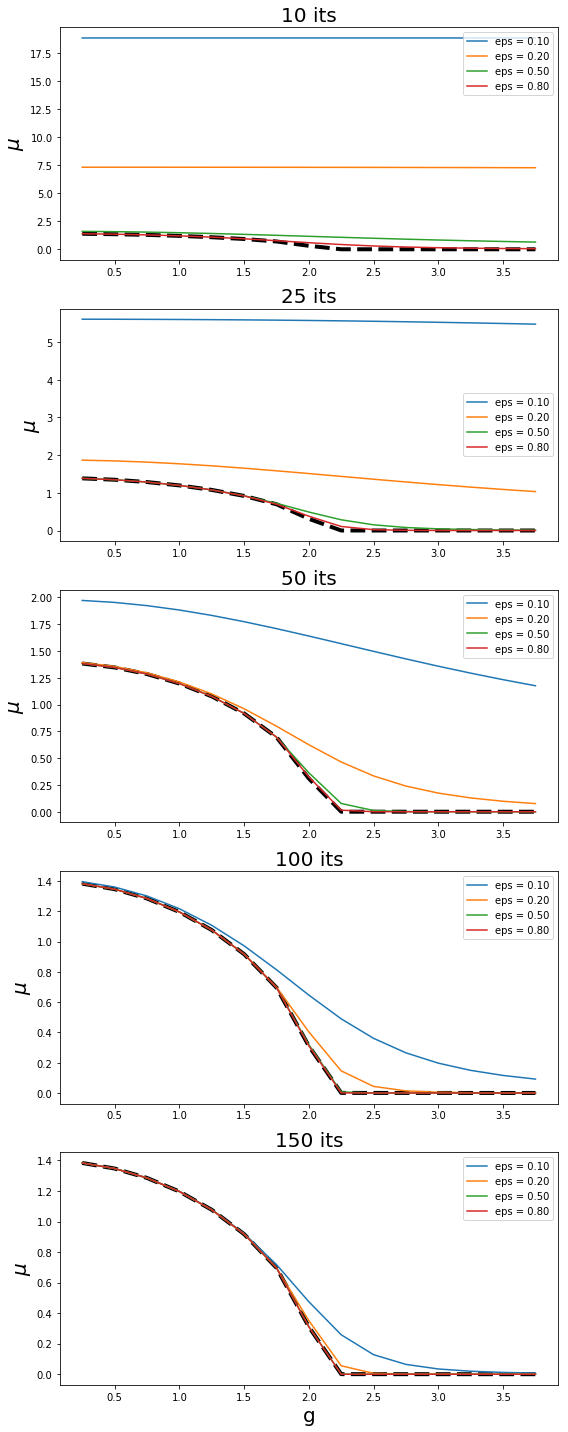

In [21]:
fontsize = 20
plt.figure(figsize=(8, 20))
for j in range(num_its):
    plt.subplot(num_its, 1, j+1)
    plt.plot(_g, mu_true, 'k--', lw=4)
    for i in range(num_eps):
        plt.plot(_g, all_mus[j,i,:], label='eps = %.2f' % eps_list[i])
        plt.ylabel(r'$\mu$', fontsize=fontsize)
    plt.title('%d its' % its_list[j], fontsize=fontsize)
    plt.legend()
plt.xlabel('g', fontsize=fontsize)
plt.tight_layout()
plt.show()

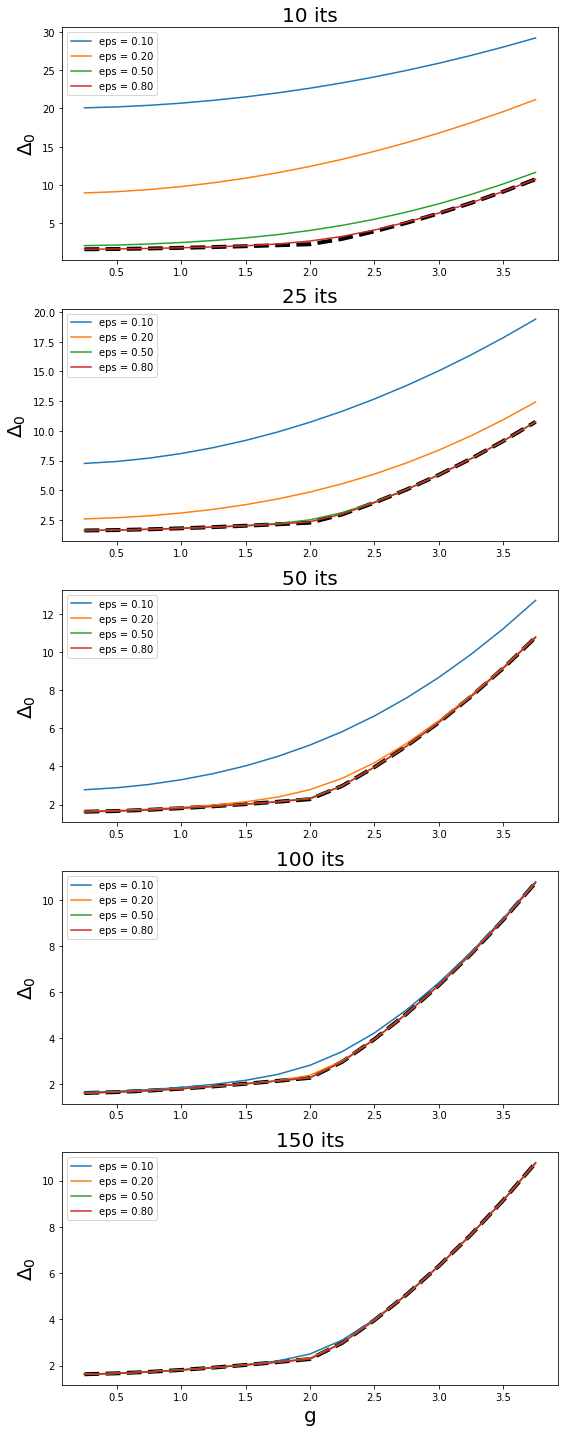

In [27]:
fontsize = 20
plt.figure(figsize=(8, 20))
for j in range(num_its):
    plt.subplot(num_its, 1, j+1)
    plt.plot(_g, delta_0_true, 'k--', lw=4)
    for i in range(num_eps):
        plt.plot(_g, all_delta_0s[j,i,:], label='eps = %.2f' % eps_list[i])
        plt.ylabel(r'$\Delta_0$', fontsize=fontsize)
    plt.title('%d its' % its_list[j], fontsize=fontsize)
    plt.legend()
plt.xlabel('g', fontsize=fontsize)
plt.tight_layout()
plt.show()

# Spontaneous chaotic solver

In [33]:
DTYPE = tf.float64

num_its = 100
eps = 0.2

g_start = 0.25
g_end = 4.0
g_delt = 0.25
_g = np.arange(g_start, g_end, g_delt) # np.abs(np.random.normal(0.0, 1.0, (n,))) + .001
n = _g.shape[0]

_mu_init = 50.0*np.ones((n,))
_delta_0_init = 55.0*np.ones((n,))
_delta_inf_init = 45.0*np.ones((n,))

_Mm = 1.1*np.ones((n,)) # np.abs(np.random.normal(0.0, 1.0, (n,))) + .001
_Mn = 2.0*np.ones((n,))
_Sm = 1.0*np.ones((n,))

mu_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_0_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_inf_init = tf.placeholder(dtype=DTYPE, shape=(n,))

g = tf.placeholder(dtype=DTYPE, shape=(n,))
Mm = tf.placeholder(dtype=DTYPE, shape=(n,))
Mn = tf.placeholder(dtype=DTYPE, shape=(n,))
Sm = tf.placeholder(dtype=DTYPE, shape=(n,))

its_list = [200]
eps_list = [0.1, 0.2, 0.5, 0.8, 0.9]

num_its = len(its_list)
num_eps = len(eps_list)

all_mus = []
all_delta_0s = []
all_delta_infs = []

mu_error = np.zeros((num_its, num_eps))
delta_0_error = np.zeros((num_its, num_eps))
delta_inf_error = np.zeros((num_its, num_eps))

mu_true = np.zeros((n,))
delta_0_true = np.zeros((n,))
delta_inf_true = np.zeros((n,))

for k in range(n):
    y0_k = [_mu_init[k], _delta_0_init[k], _delta_inf_init[k]]
    VecPar_k = [_Mm[k], _Mn[k], _Sm[k], 0.0]
    y = mf.SolveChaotic(y0_k, _g[k], VecPar_k, tolerance=1e-8, backwards=1)
    mu_true[k] = y[0]
    delta_0_true[k] = y[1]
    delta_inf_true[k] = y[2]
        
for i in range(num_its):
    its = its_list[i]
    mus_i = np.zeros((num_eps, n, its+1))
    delta_0s_i = np.zeros((num_eps, n, its+1))
    delta_infs_i = np.zeros((num_eps, n, its+1))
    for j in range(num_eps):
        eps = eps_list[j]
        print(its, eps)
        mu, delta_0, delta_inf, xs = spont_chaotic_solve(mu_init, delta_0_init, delta_inf_init, \
                                                     g, Mm, Mn, Sm, its, eps, db=True)

        feed_dict = {mu_init:_mu_init, delta_0_init:_delta_0_init, delta_inf_init:_delta_inf_init, \
                     g:_g, Mm:_Mm, Mn:_Mn, Sm:_Sm}
        
        with tf.Session() as sess:
            _mu, _delta_0, _delta_inf, _xs = sess.run([mu, delta_0, delta_inf, xs], feed_dict)
            
        mus_i[j,:,:] = _xs[:,0,:]
        delta_0s_i[j,:,:] = _xs[:,1,:]
        delta_infs_i[j,:,:] = _xs[:,2,:]
        
        mu_error[i,j] = np.mean(np.square(_mu - mu_true))
        delta_0_error[i,j] = np.mean(np.square(_delta_0 - delta_0_true))
        delta_inf_error[i,j] = np.mean(np.square(_delta_inf - delta_inf_true))
        
    all_mus.append(mus_i)
    all_delta_0s.append(delta_0s_i)
    all_delta_infs.append(delta_infs_i)


# its 67
# its 68
# its 70
# its 74
# its 80
# its 93
# its 129
# its 541
# its 1605
# its 586
# its 394
# its 364
# its 356
# its 352
# its 354
200 0.1
200 0.2
200 0.5
200 0.8
200 0.9


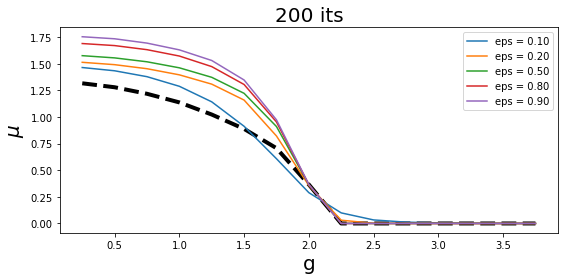

In [34]:
fontsize = 20
plt.figure(figsize=(8, 4))
for j in range(num_its):
    plt.subplot(num_its, 1, j+1)
    plt.plot(_g, mu_true, 'k--', lw=4)
    for i in range(num_eps):
        plt.plot(_g, all_mus[j][i,:,-1], label='eps = %.2f' % eps_list[i])
        plt.ylabel(r'$\mu$', fontsize=fontsize)
    plt.title('%d its' % its_list[j], fontsize=fontsize)
    plt.legend()
plt.xlabel('g', fontsize=fontsize)
plt.tight_layout()
plt.show()

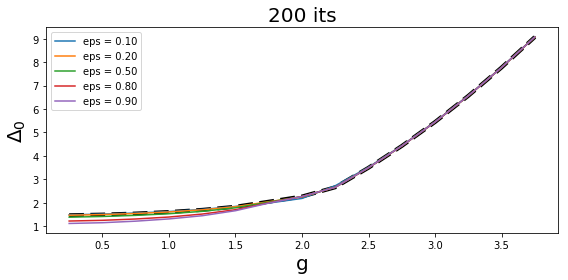

In [35]:
fontsize = 20
plt.figure(figsize=(8, 4))
for j in range(num_its):
    plt.subplot(num_its, 1, j+1)
    plt.plot(_g, delta_0_true, 'k--', lw=4)
    for i in range(num_eps):
        plt.plot(_g, all_delta_0s[j][i,:,-1], label='eps = %.2f' % eps_list[i])
        plt.ylabel(r'$\Delta_0$', fontsize=fontsize)
    plt.title('%d its' % its_list[j], fontsize=fontsize)
    plt.legend()
plt.xlabel('g', fontsize=fontsize)
plt.tight_layout()
plt.show()

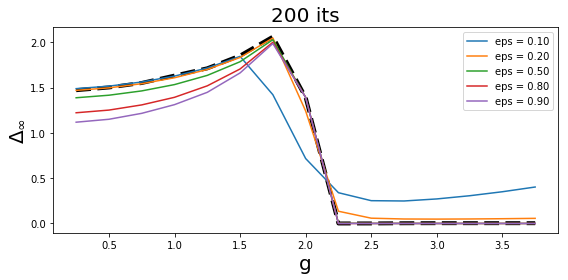

In [36]:
fontsize = 20
plt.figure(figsize=(8, 4))
for j in range(num_its):
    plt.subplot(num_its, 1, j+1)
    plt.plot(_g, delta_inf_true, 'k--', lw=4)
    for i in range(num_eps):
        plt.plot(_g, all_delta_infs[j][i,:,-1], label='eps = %.2f' % eps_list[i])
        plt.ylabel(r'$\Delta_{\infty}$', fontsize=fontsize)
    plt.title('%d its' % its_list[j], fontsize=fontsize)
    plt.legend()
plt.xlabel('g', fontsize=fontsize)
plt.tight_layout()
plt.show()

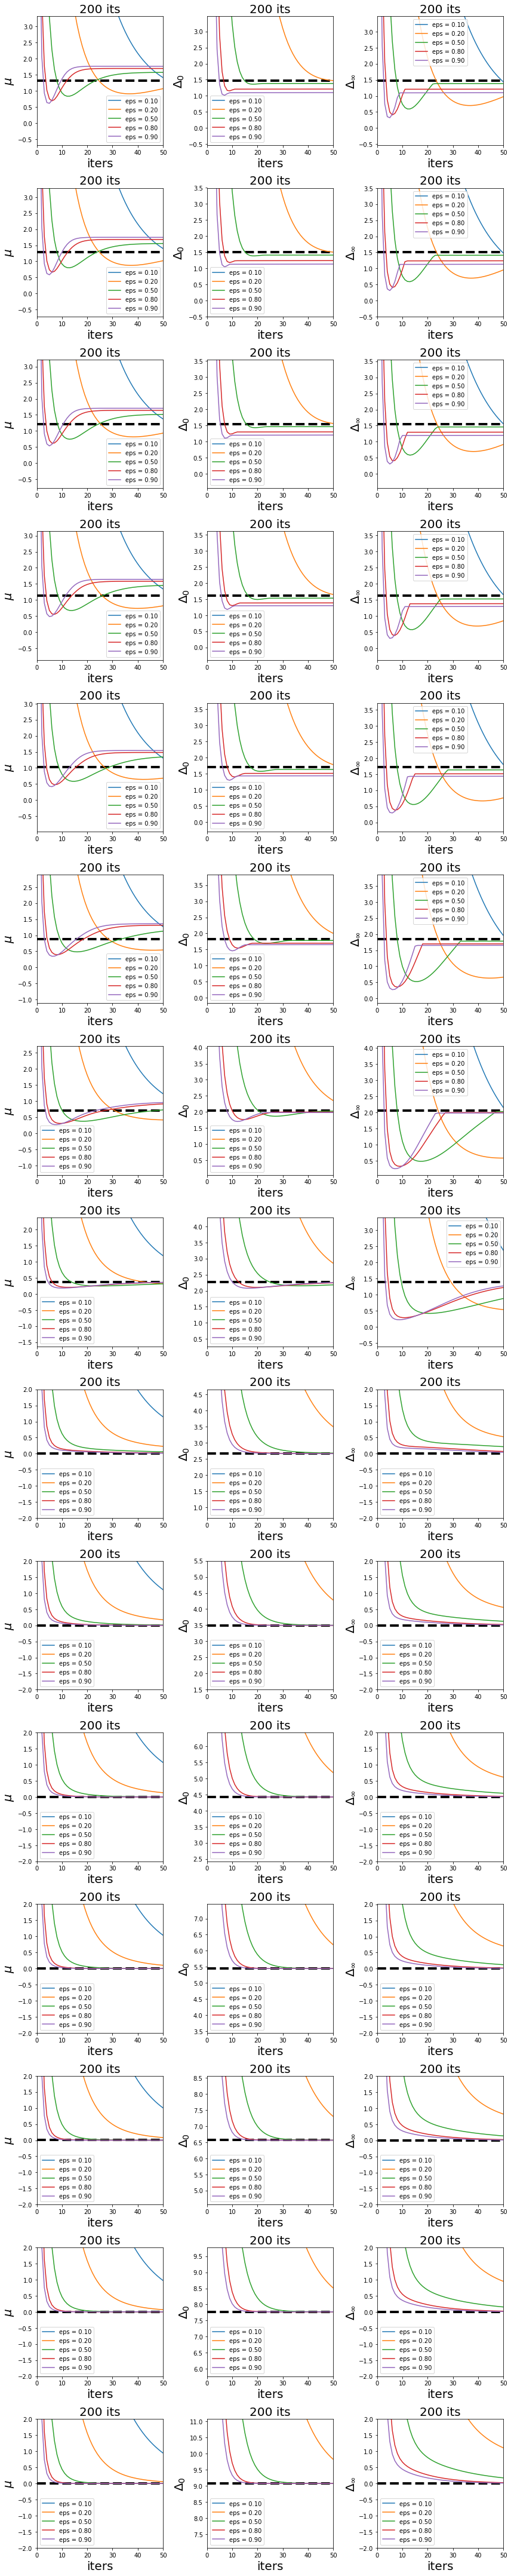

In [38]:
fontsize = 20
fig, axs = plt.subplots(n, 3, figsize=(12, 4*n))

max_its = 50
j=0
its = its_list[j]
for g_ind in range(n):
    mu_targ = mu_true[g_ind]
    delta_0_targ = delta_0_true[g_ind]
    delta_inf_targ = delta_inf_true[g_ind]
    
    ax = axs[g_ind][0]
    ax.plot([0, its+1], [mu_targ, mu_targ], 'k--', lw=4)
    for i in range(num_eps):
        ax.plot(np.arange(its+1), all_mus[j][i,g_ind,:], label='eps = %.2f' % eps_list[i])
        ax.set_ylabel(r'$\mu$', fontsize=fontsize)
    ax.set_title('%d its' % its_list[j], fontsize=fontsize)
    ax.legend()
    ax.set_xlim([0, max_its])
    ax.set_xlabel('iters', fontsize=fontsize)
    ax.set_ylim([mu_targ-2, mu_targ+2])
    
    ax = axs[g_ind][1]
    ax.plot([0, its+1], [delta_0_targ, delta_0_targ], 'k--', lw=4)
    for i in range(num_eps):
        ax.plot(np.arange(its+1), all_delta_0s[j][i,g_ind,:], label='eps = %.2f' % eps_list[i])
        ax.set_ylabel(r'$\Delta_{0}$', fontsize=fontsize)
    ax.set_title('%d its' % its_list[j], fontsize=fontsize)
    ax.legend()
    ax.set_xlabel('iters', fontsize=fontsize)
    ax.set_xlim([0, max_its])
    ax.set_ylim([delta_0_targ-2, delta_0_targ+2])
    
    ax = axs[g_ind][2]
    ax.plot([0, its+1], [delta_inf_targ, delta_inf_targ], 'k--', lw=4)
    for i in range(num_eps):
        ax.plot(np.arange(its+1), all_delta_infs[j][i,g_ind,:], label='eps = %.2f' % eps_list[i])
        ax.set_ylabel(r'$\Delta_{\infty}$', fontsize=fontsize)
    ax.set_title('%d its' % its_list[j], fontsize=fontsize)
    ax.legend()
    ax.set_xlim([0, max_its])
    ax.set_ylim([delta_inf_targ-2, delta_inf_targ+2])
    ax.set_xlabel('iters', fontsize=fontsize)
    
    
plt.tight_layout()
plt.show()